In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [3]:
x_vals = np.arange(-1000, 1000, 0.5)
vals = []
for x in x_vals:
    vals.append(sigmoid(x))

print("Minimum = ", np.min(vals))
print("Maximum = ",np.max(vals))

Minimum =  0.0
Maximum =  1.0


C:\Users\Sanjay Sane\AppData\Local\Temp\ipykernel_30176\2445095538.py:2: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))


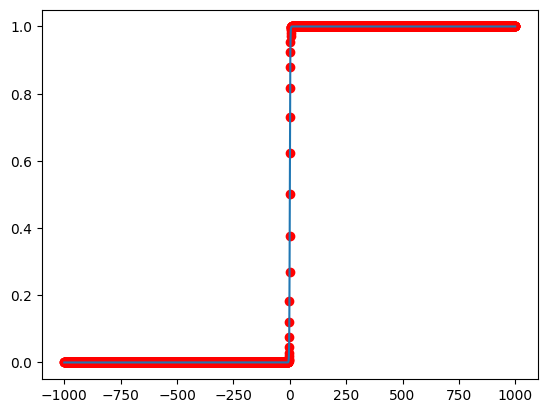

In [78]:
plt.plot(x_vals, vals)
plt.scatter(x_vals, vals, c="red")
plt.show()

In [5]:
def log_loss(expected, prob):
    return -np.sum( expected*np.log(prob) + (1-expected)*np.log(1-prob) )/len(expected)

In [7]:
x = np.array([1.2, 1.4, 0.5, 0.6, 1.1, 1.3])
y = np.array([1, 1, 0, 0, 1, 1])

In [9]:
init_b, init_w = 0.1, 0.1
eta = 0.1

Batch Gradient Descent

In [17]:
w, b = init_w, init_b
tol = 0.01
for i in range(0, 100000):
    y_hat = sigmoid(x*w +b)
    L = log_loss(y, y_hat)
    if L < tol:
        print(f"Algo stopped at {i+1}th iteration as Loss < Tolerance {tol}")
        print("w = " ,w , ", b =", b)
        print("Loss = ", L)
        break
    db = -np.mean(y-y_hat)
    dw = -np.mean((y-y_hat)*x)
    new_w = w - eta*dw 
    new_b = b - eta*db 
    b, w = new_b, new_w

Algo stopped at 22422th iteration as Loss < Tolerance 0.01
w =  14.932983566087332 , b = -12.528587829527496
Loss =  0.00999963924349252


In [18]:
L

0.00999963924349252

Stochastic Gradient Descent

In [19]:
w, b = init_w, init_b
tol = 0.01
for i in range(0, 100000):
    for j in range(0, len(x)):
        y_hat = sigmoid(x[j]*w +b)
        db = -(y[j]-y_hat)
        dw = -((y[j]-y_hat)*x[j])
        new_w = w - eta*dw 
        new_b = b - eta*db 
        b, w = new_b, new_w
    
    y_hat_all = sigmoid(x*w +b)
    L = log_loss(y, y_hat_all)
    if L < tol:
        print(f"Algo stopped at {i+1}th iteration as Loss < Tolerance {tol}")
        print("w = " ,w , ", b =", b)
        print("Loss = ", L)
        break

Algo stopped at 3724th iteration as Loss < Tolerance 0.01
w =  14.934107014300606 , b = -12.527903529116305
Loss =  0.009998813545891534


#### Min-Batch Gradient Descent

In [86]:
batches = [[0,1,2],[3,4,5]]
y[batches[1]]

array([0, 1, 1])

In [20]:
w, b = init_w, init_b
tol = 0.01
batches = [[0,1,2],[3,4,5]]
for i in range(0, 10000):
    for batch in batches:
        y_hat = sigmoid(x[batch]*w +b)
        db = -np.mean(y[batch]-y_hat)
        dw = -np.mean((y[batch]-y_hat)*x[batch])
        new_w = w - eta*dw 
        new_b = b - eta*db 
        b, w = new_b, new_w
    
    y_hat_all = sigmoid(x*w +b)
    L = log_loss(y, y_hat_all)
    if L < tol:
        print(f"Algo stopped at {i+1}th iteration as Loss < Tolerance {tol}")
        print("w = " ,w , ", b =", b)
        print("Loss = ", L)
        break

In [22]:
L

0.01114461886523342

In [23]:
w, b = init_w, init_b
tol = 0.01
batches = [[0,1],[2,3],[4,5]]
for i in range(0, 10000):
    for batch in batches:
        y_hat = sigmoid(x[batch]*w +b)
        db = -np.mean(y[batch]-y_hat)
        dw = -np.mean((y[batch]-y_hat)*x[batch])
        new_w = w - eta*dw 
        new_b = b - eta*db 
        b, w = new_b, new_w
    
    y_hat_all = sigmoid(x*w +b)
    L = log_loss(y, y_hat_all)
    if L < tol:
        print(f"Algo stopped at {i+1}th iteration as Loss < Tolerance {tol}")
        print("w = " ,w , ", b =", b)
        print("Loss = ", L)
        break

Algo stopped at 7452th iteration as Loss < Tolerance 0.01
w =  14.93366870514735 , b = -12.528467210745575
Loss =  0.009998732901535069


In [26]:
from torch.utils.data import DataLoader
import torch

In [34]:
t = torch.arange(6, dtype=torch.float32)
torch.manual_seed(24)
data_loader = DataLoader(t, batch_size=3, drop_last=True, shuffle=True)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)
    

batch 1: tensor([2., 1., 0.])
batch 2: tensor([3., 4., 5.])
